In [121]:
%load_ext autoreload
%autoreload 2
%aimport -jax
%aimport -jaxlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
from jax.random import PRNGKey
import jax.numpy as jnp
import jax

from stanza.envs.pymunk import PyMunkEnv, BodyState
import pymunk

def make_space(rng_key):
    space = pymunk.Space()
    space.gravity = (0, -9.8)
    body = pymunk.Body(1.0, 1.0)
    body.name = 'circle'
    space.add(body, pymunk.Circle(body, 1.0))
    return space

env = PyMunkEnv(width=15., height=15.,
    sim_hz=100., space_builder=make_space)
state = env.reset(PRNGKey(0))
state = env.step(state, None, None)

In [201]:
import stanza.policies as policies
rollout = policies.rollout(env.step, state, length=100)

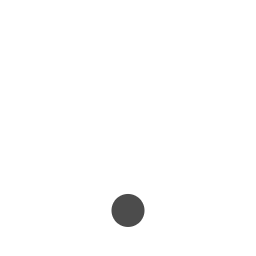

In [206]:
import IPython.display as display
last_state = jax.tree_map(lambda x: x[-1], rollout.states)
img = env.render(last_state)
from PIL import Image
import numpy as np
img = Image.fromarray(np.array((255*img).astype(np.uint8)), 'RGB')
display.display(img)